In [7]:
import matplotlib
from matplotlib import pyplot as plt
from decimal import Decimal


import math
from math import sin, cos, pi

import numpy as np

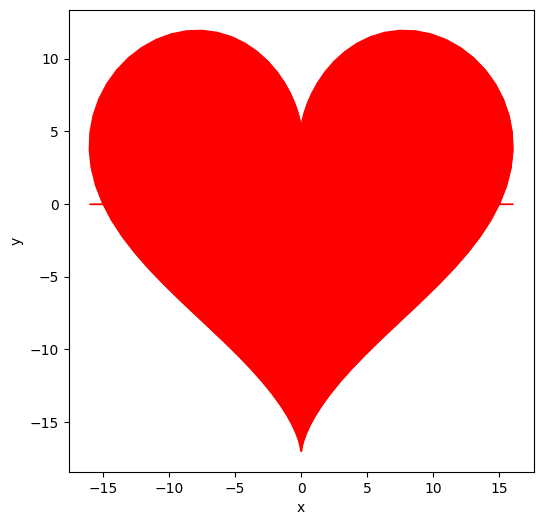

In [15]:
def x(t):
    return 16 * sin(t) ** 3

def y(t):
    return 13 * cos(t) - 5 * cos(2*t) - 2 * cos(3*t) - cos(4*t)

data = np.linspace(0, 2*pi, 100)
xs = [x(t) for t in data]
ys = [y(t) for t in data]

plt.figure(figsize=(6, 6))
plt.plot(xs, ys, color='red')
plt.fill_between(xs, ys, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

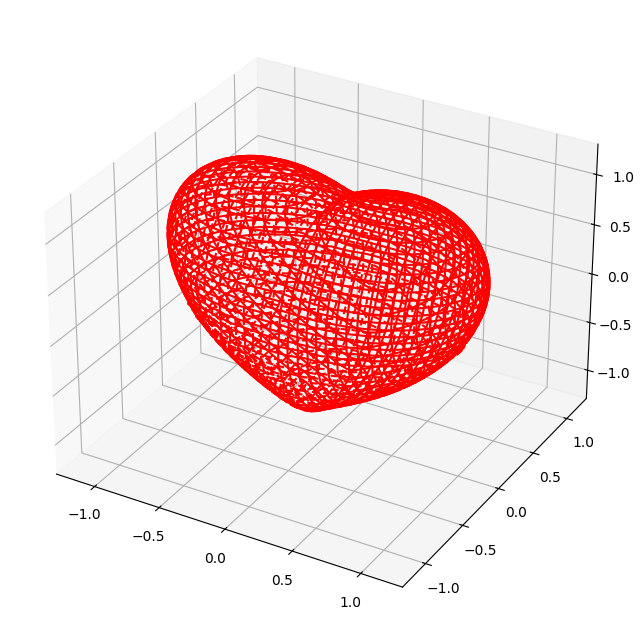

In [4]:
def draw(figure_func, bbox=(-1.3, 1.3)):
    xmin, xmax, ymin, ymax, zmin, zmax = bbox * 3
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')
    a = np.linspace(xmin, xmax, 80)
    b = np.linspace(xmin, xmax, 40)
    a1, a2 = np.meshgrid(a, a)
    for x in b:
        y, z = a1, a2
        X = figure_func(x, y, z)
        ax.contour(X + x, y, z, [x], zdir='x', colors=('red',))
    for y in b:
        x, z = a1, a2
        Y = figure_func(x, y, z)
        ax.contour(x, Y + y, z, [y], zdir='y', colors=('red',))
    for z in b:
        x, y = a1, a2
        Z = figure_func(x, y, z)
        ax.contour(x, y, Z + z, [z], zdir='z', colors=('red',))
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    ax.set_zlim3d(zmin, zmax)
    plt.show()

def figure_func(x, y, z):
    return (x**2 + 9 * y**2 / 4 + z**2 - 1)**3 - x**2 * z**3 - (9 * y**2 * z**3) / 200

draw(figure_func)


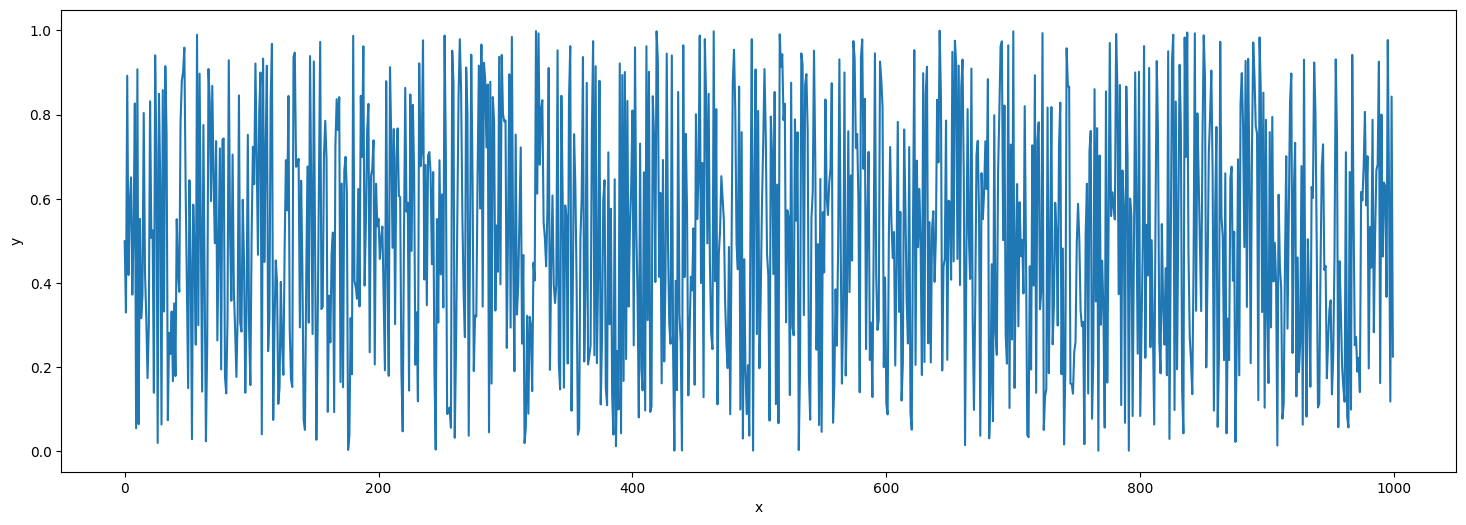

In [13]:
def noise(x, y):
    n = sin(x * 12.9898 + y * 78.233) * 43758.5453
    return n - math.floor(n)

width = 1000
fixed_row = 500
xs = list(range(width))
ys = [noise(x, fixed_row) for x in xs]

plt.figure(figsize=(18, 6))
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

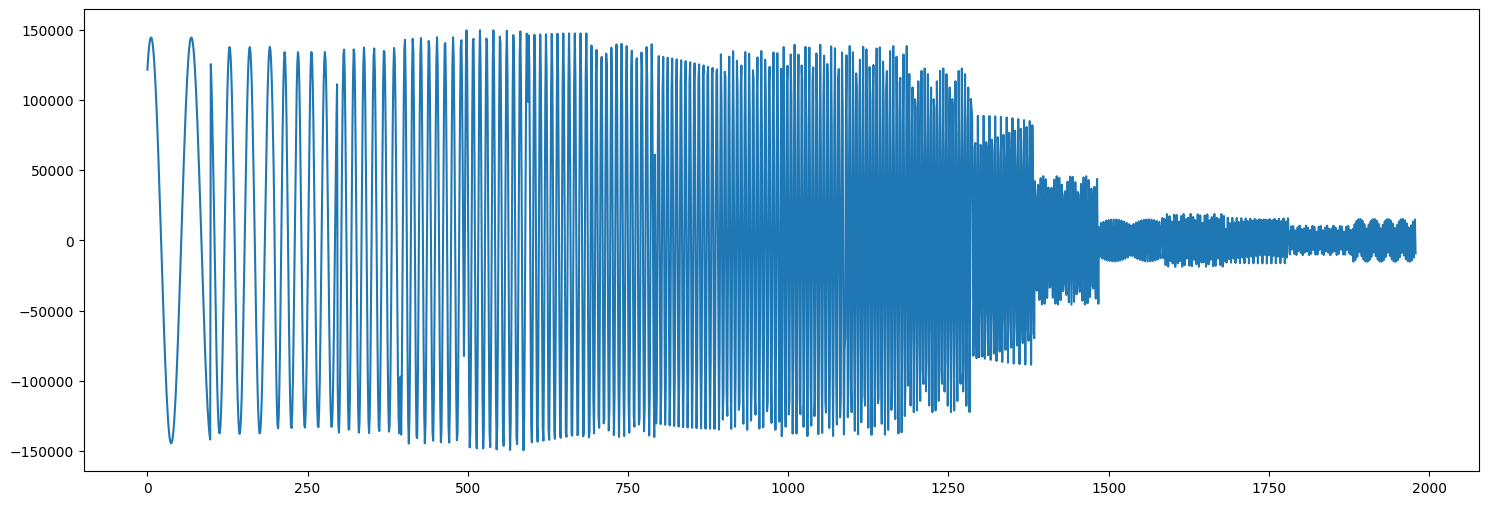

In [29]:
import matplotlib.pyplot as plt
import math
from decimal import Decimal

k = [6, 0, -4 -3, 5, 6, -6, -13, 7, 44, 64, 44, 7, -13, -6, 6, 5, -3, -4, 0, 6]


def float_range(start, stop, step):
    while start < stop:
        yield start
        start += step


omega_list = list(float_range(Decimal(0.1), Decimal(2.1), Decimal(0.1)))
ex_list = []
for omega in omega_list:
    for t in range(1, 100):
        acc = 0
        for b in range(0, 20):
            x = round(1000 * math.sin(omega * (t + b)))
            acc = acc + x * k[b]
        ex_list.append(acc)

plt.figure(figsize=(18, 6))
plt.plot(ex_list)
plt.show()
